In [5]:
# %load init.ipy
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()
from Chempy.score_function import preload_params_mcmc
preload = preload_params_mcmc()
from Chempy.wrapper import single_star_optimization
from Chempy.plot_mcmc import restructure_chain

Populating the interactive namespace from numpy and matplotlib


In [6]:
restructure_chain('BestMCMC/')

blob shape =  (64, 303, 8, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
0.304305136827 2.50400785935
Mean posteriors after the burn-in tail is cut out:
0.304305136827 0.190916234049
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
3.25414898157 -9.93614910631
Highest posterior was obtained at parameters:  [[ 0.79955457 -2.04061725 -3.2254755  -0.06260366  0.54786355  0.55733585]]
Number of unique posterior values:  2545
Inferred marginalized parameter distributions are:
0 0.698255229184 +- 0.367117797097
1 -1.97041555922 +- 0.221921134421
2 -3.17123855184 +- 0.212148075301
3 -0.287602747238 +- 0.354401559135
4 0.577012027743 +- 0.0910307407951
5 0.541237719369 +- 0.0953248202287


In [83]:
positions = np.load('BestMCMC/posteriorPDF.npy')
MCMC_param = np.median(positions,axis=0) # Best parameters from MCMC

from Chempy.cem_function import posterior_function_returning_predictions
MCMC_el,elements=posterior_function_returning_predictions((MCMC_param,a))

dat = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_NuGrid_net.npz')
data_list=[dat]
means=[data['mean'] for data in data_list]
sigmas=[data['sigma'] for data in data_list]
dat.close()

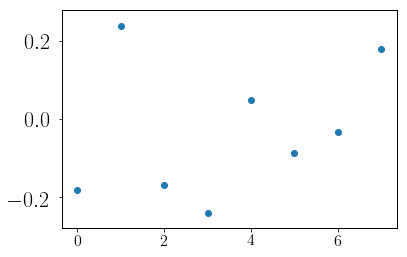

In [84]:
plt.scatter(np.arange(len(names)),MCMC_el,marker='o')

In [87]:
#  Reorder
alpha_names = ['He','C','N','O','Ne','Mg','Si','Fe']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig,re_MCMC = [],[],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_MCMC.append(MCMC_el[k])
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)
    
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

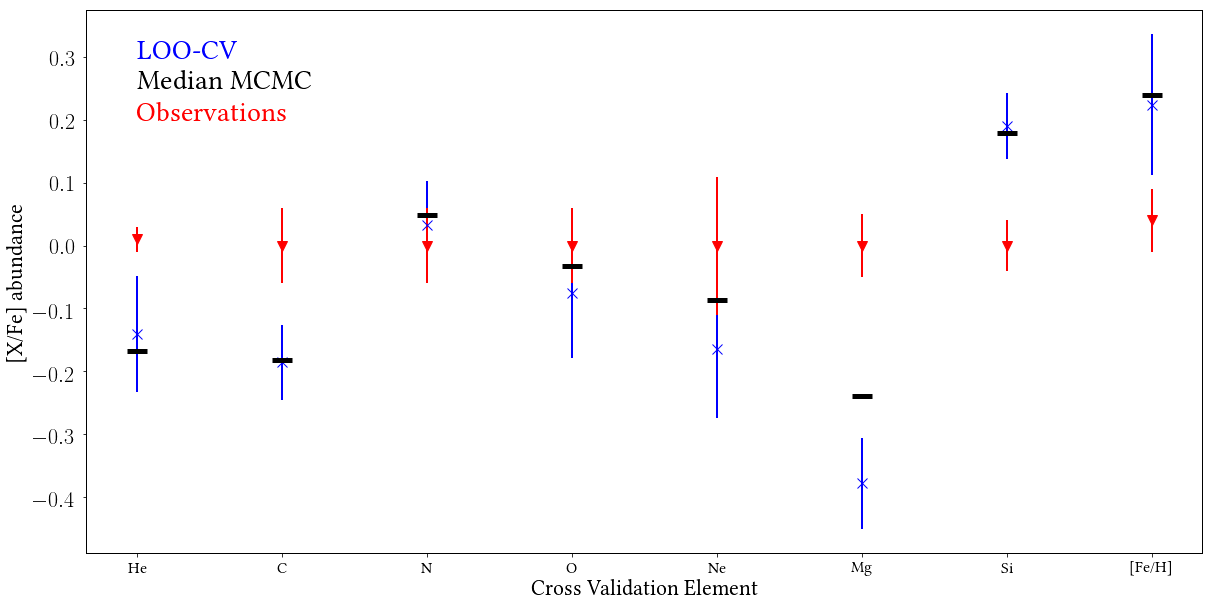

In [113]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
small_text = 16
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

plt.errorbar(np.arange(len(alpha_names)),alphamean[0],yerr=alphasigma[0],c='b',fmt='x',ms=marker_size,label='LOO-CV predictions')
plt.errorbar(np.arange(len(alpha_names)),re_MCMC,fmt='_',c='k',mew=5,ms=20,label='Best Posterior Predictions')
plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,c='r',ms=marker_size,fmt='v',label='Observations')
#plt.legend()

xtext = 0
ytext = 0.3
ytextgap = 0.05
plt.text(xtext,ytext,'LOO-CV',color='b')
plt.text(xtext,ytext-ytextgap,'Median MCMC',color='k')
plt.text(xtext,ytext-ytextgap*2,'Observations',color='r')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
#elements = alpha_names.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)

plt.savefig('PaperPlots/LOOCV-MCMC.pdf',dpi=300,bbox_inches='tight')

In [75]:
alphamean[0]

[-0.29944820896703084,
 -0.92051711978837003,
 0.52890357684536016,
 0.83770486797665078,
 0.28824764029217975,
 -0.19781928670057458,
 0.20600172783554474]

In [76]:
elements

['C', '[Fe/H]', 'He', 'Mg', 'N', 'Ne', 'O', 'Si']

array(['Al', 'Ar', 'C', 'Ca', 'Cl', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'Ga',
       'Ge', 'He', 'K', 'Mg', 'Mn', 'N', 'Na', 'Ne', 'Ni', 'O', 'P', 'S',
       'Sc', 'Si', 'Ti', 'V', 'Zn'], 
      dtype='<U2')